In [26]:
!pip install pycoingecko
!pip install plotly
!pip install mplfinance

In [24]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.offline import plot
import matplotlib.pyplot as plt
import datetime
from pycoingecko import CoinGeckoAPI

In [27]:
dict_={'a':[11,21,31],'b':[12,22,32]}

In [28]:
df=pd.DataFrame(dict_)
type(df)

pandas.core.frame.DataFrame

In [29]:
df.head()

,a,b
0,11,12
1,21,22
2,31,32


In [30]:
df.mean()

a    21.0
b    22.0
dtype: float64

In [31]:
cg = CoinGeckoAPI()

bitcoin_data = cg.get_coin_market_chart_by_id(id='bitcoin', vs_currency='usd', days=30)

In [32]:
type(bitcoin_data )

dict

In [33]:
bitcoin_price_data = bitcoin_data['prices']

bitcoin_price_data[0:5]

[[1616760799797, 52803.97412720671],
 [1616763774928, 52961.044361849184],
 [1616768145895, 53231.86159351403],
 [1616771660225, 53398.670308864224],
 [1616776417918, 53685.67192080944]]

In [35]:
data = pd.DataFrame(bitcoin_price_data, columns=['TimeStamp', 'Price'])

In [37]:
data['Date'] = pd.to_datetime(data['TimeStamp'], unit='ms')

In [38]:
candlestick_data = data.groupby(data.Date.dt.date, as_index=False).agg({"Price": ['min', 'max', 'first', 'last']})

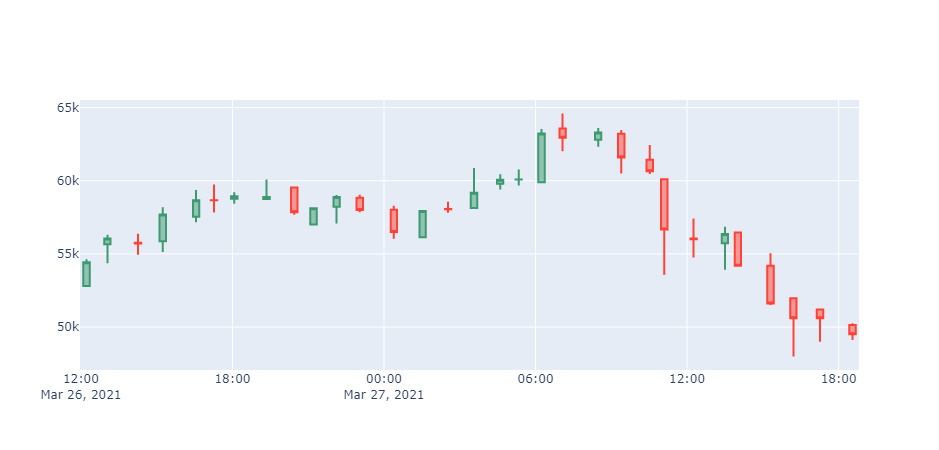

In [41]:
fig = go.Figure(data=[go.Candlestick(x=data['Date'],
                open=candlestick_data['Price']['first'], 
                high=candlestick_data['Price']['max'],
                low=candlestick_data['Price']['min'], 
                close=candlestick_data['Price']['last'])
                ])

fig.update_layout(xaxis_rangeslider_visible=False)

fig.show()